# 5. Numerical integration of the Hodgkin & Huxley (HH) model of the squid axon

In the HH model, different specific voltage-dependent ion channels control the flow of ions through the cell membrane; they control the flow of sodium, potassium and a leak current (mainly Cl- ions). Below is a schematic diagram for the hodgkin & huxley model, where each channel type is represented by a resistor. 

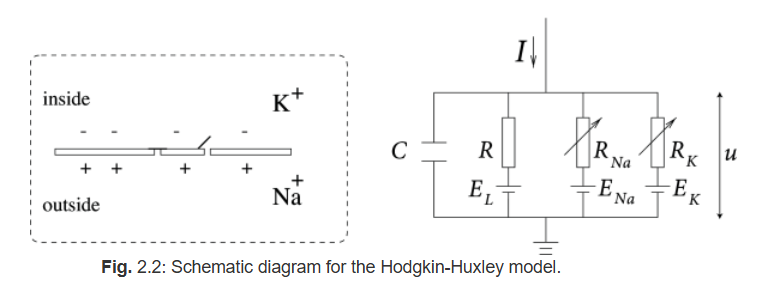

Because of this active ion transport through the cell membrane, a so called Nernst potential is generated for each ion type.The breakthrough of Hodgkin and Huxley was that they succeeded to measure how the effective resistance of a channel changes as a function of time and voltage by introducing 'gating variables': *m, n* and *h*. m and h control the Na+ channels; 1/R_Na = g_Na * m^3 * h, where m describes the opening ofthe channel and h the blocking. K+ channels are controlled by n; 1/R_K = g_K * n^4, where n describes the activation of the channel. 

In summary, the HH model is mathematically represented as: 

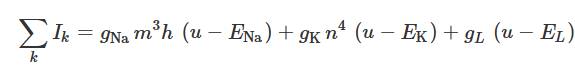

where E_Na, E_K and E_L are the reversal potentials:

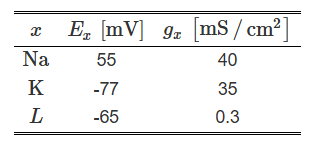



WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


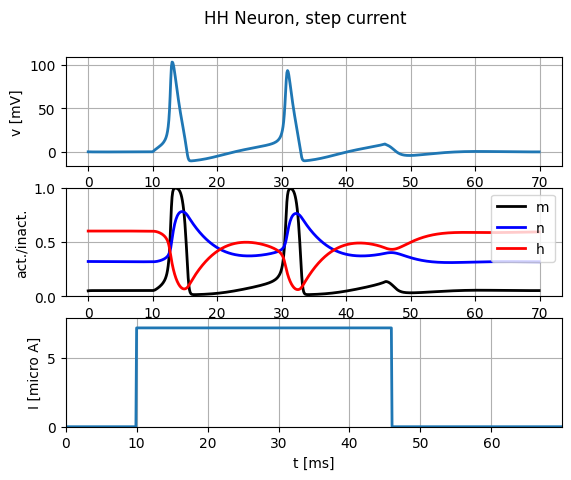

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

HH.getting_started()

***5.1. Exercise: step current response***

We study the response of a Hodgkin-Huxley neuron to different input currents. 

*What is the lowest step current amplitude Imin for generating at least one spike? Determine the value by trying different input amplitudes.*

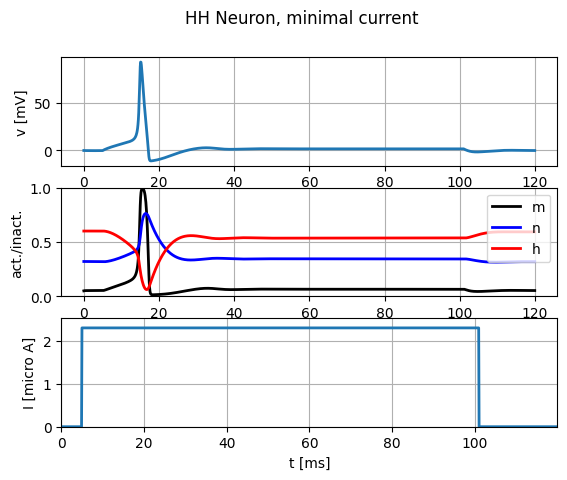

In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

I_min = 2.299

current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

*What is the lowest step current amplitude to generate repetitive firing?*

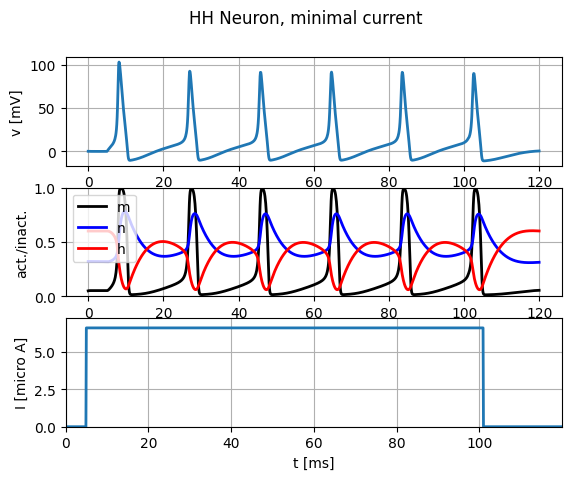

In [3]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

I_min = 6.6

current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

*Discuss the difference between the two regimes.*



To discuss these figures, we must first understand the different ion channel dynamics during spike generation. 
When an external input causes the membrane voltage to rise, the conductance of the channels change; m and n increasde with u, while h decreases. Thus the conductance of sodium channels will increase, causing positive sodium ions to flow out which will further increase the membrane potential. This explosive positive feedback will slow down once the membrane potential reaches sodium's Nernst/reversal potential. 

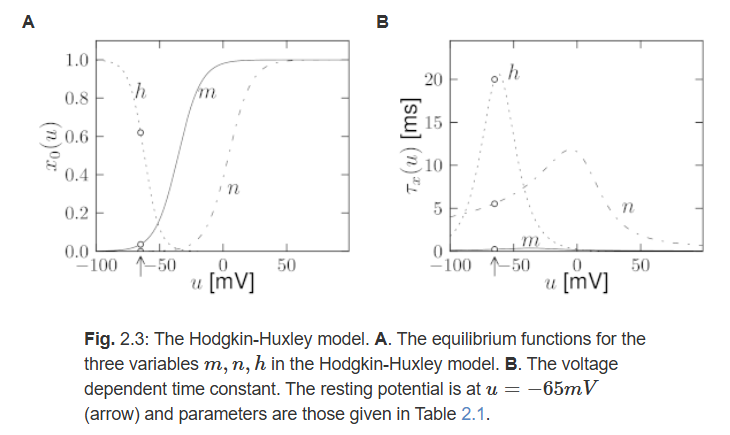

After a while, the h variable will start to decrease, causing the sodium channels to close. Due to its high time constant, the closing of the sodium channels will only take place after a certain delay. The same goes for the variable n; over time it will slowly increase, but slower than m. Eventually, the potassium channels will open and cause the outward flow of potassium which will repolarize the membrane.  


In the first simulation, the stimulating current is enough to generate one spike.

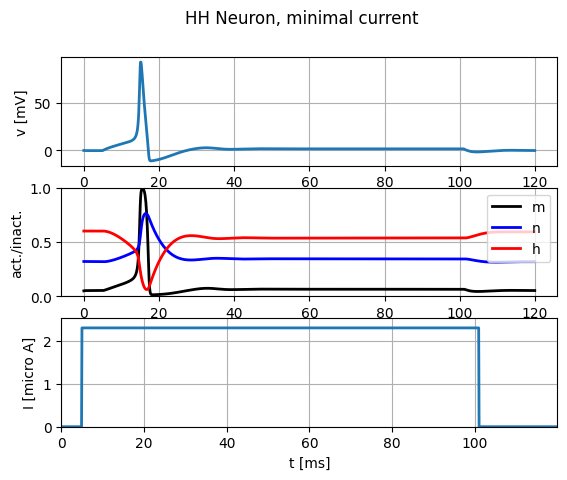

However, the neuron returns to its resting state afterwards because the inward sodium current is no longer sufficient to trigger another action potential. 

In the second plot, the neuron undergoes repetitive firing. As we can see in the figure below, the higher stimulation current causes m to rise more rapidly than in the previous simulation. This allows the neuron to enter a regime of spiking due to sodium influx. 

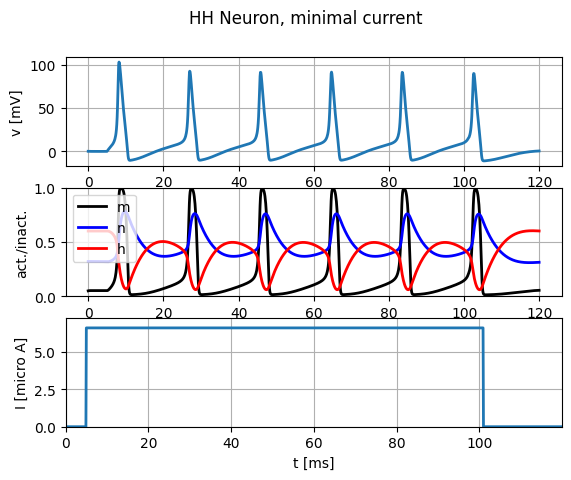

*The minimal current to elicit a spike does not just depend on the amplitude I or on the total charge Q
of the current, but on the “shape” of the current.*

*Inject a slow ramp current into a HH neuron. The current has amplitude 0A at t in [0, 5] ms and linearly increases to an amplitude of 12.0uAmp at t=ramp_t_end. At t>ramp_t_end, the current is set to 0A.*

*What is the membrane voltage at the time when the current injection stops (t=slow_ramp_t_end)?*


voltage_slow=-7.77603293 mV


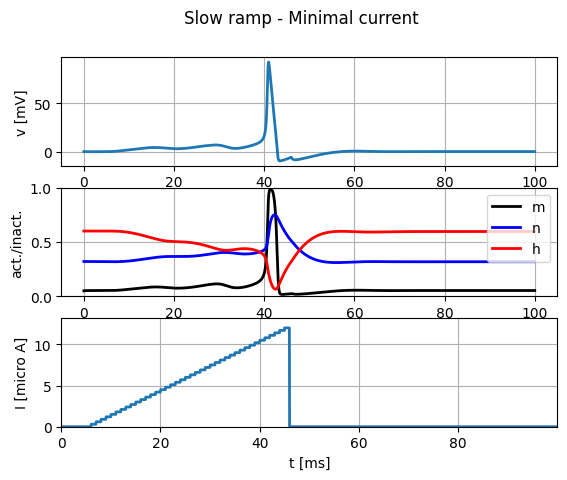

In [11]:
import brian2 as b2
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

b2.defaultclock.dt = 0.02 * b2.ms

slow_ramp_t_end = 45  # ms
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0. * b2.uA, 12.0 * b2.uA)

simulation_time = (slow_ramp_t_end + 20) * b2.ms 
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, simulation_time)

total_time_steps = state_monitor.vm.shape[1] 
idx_t_end = min(int(round(slow_ramp_t_end * b2.ms / b2.defaultclock.dt)), total_time_steps - 1)

voltage_slow = state_monitor.vm[0, idx_t_end]
print(f"voltage_slow={voltage_slow}")

state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 100 * b2.ms)
HH.plot_data(state_monitor, title="Slow ramp - Minimal current")


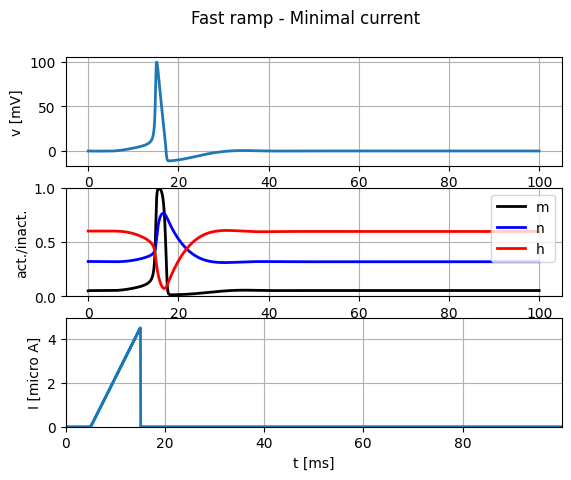

voltage_fast=82.80103002 mV


In [12]:
import brian2 as b2
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

b2.defaultclock.dt = 0.02*b2.ms

fast_ramp_t_end = 150  # no spike. make it longer
fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)

state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 100 * b2.ms)
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
HH.plot_data(state_monitor, title="Fast ramp - Minimal current")

voltage_fast = state_monitor.vm[0,idx_t_end]
print("voltage_fast={}".format(voltage_fast))

voltage_fast=82.80103002 mV
voltage_slow=-7.77603293 mV


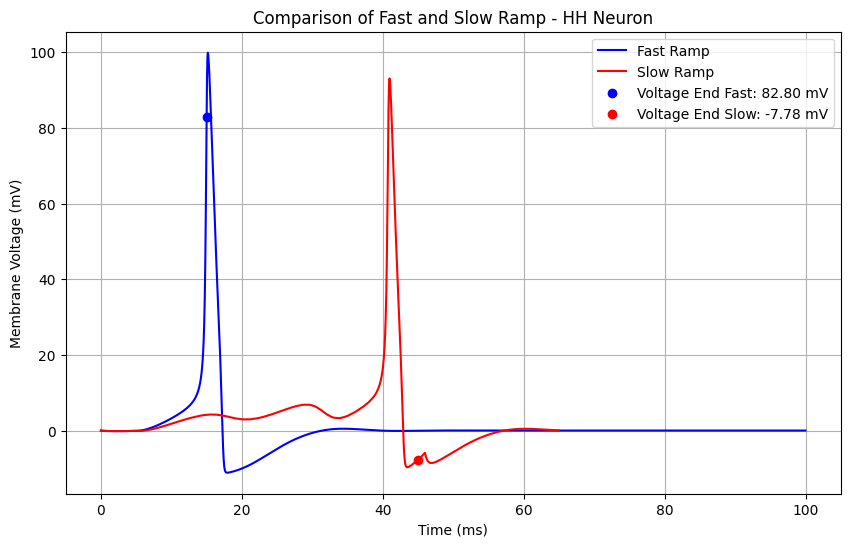

In [13]:
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

b2.defaultclock.dt = 0.02 * b2.ms

fast_ramp_t_end = 150
fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)
state_monitor_fast = HH.simulate_HH_neuron(fast_ramp_current, 100 * b2.ms)

idx_t_end_fast = int(round(fast_ramp_t_end * 0.1 * b2.ms / b2.defaultclock.dt))
voltage_fast = state_monitor_fast.vm[0, idx_t_end_fast]
print(f"voltage_fast={voltage_fast}")

slow_ramp_t_end = 45
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0. * b2.uA, 12.0 * b2.uA)
simulation_time = (slow_ramp_t_end + 20) * b2.ms
state_monitor_slow = HH.simulate_HH_neuron(slow_ramp_current, simulation_time)

total_time_steps = state_monitor_slow.vm.shape[1]
idx_t_end_slow = min(int(round(slow_ramp_t_end * b2.ms / b2.defaultclock.dt)), total_time_steps - 1)
voltage_slow = state_monitor_slow.vm[0, idx_t_end_slow]
print(f"voltage_slow={voltage_slow}")

plt.figure(figsize=(10, 6))

plt.plot(state_monitor_fast.t / b2.ms, state_monitor_fast.vm[0] / b2.mV, label="Fast Ramp", color="blue")
plt.plot(state_monitor_slow.t / b2.ms, state_monitor_slow.vm[0] / b2.mV, label="Slow Ramp", color="red")


plt.scatter(state_monitor_fast.t[idx_t_end_fast] / b2.ms, voltage_fast / b2.mV, color="blue", marker="o", label=f"Voltage End Fast: {voltage_fast / b2.mV:.2f} mV")
plt.scatter(state_monitor_slow.t[idx_t_end_slow] / b2.ms, voltage_slow / b2.mV, color="red", marker="o", label=f"Voltage End Slow: {voltage_slow / b2.mV:.2f} mV")


plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")
plt.title("Comparison of Fast and Slow Ramp - HH Neuron")
plt.legend()
plt.grid()
plt.show()


*Discuss the differences between the two situations. Why are the two “threshold” voltages different? Link your observation to the gating variables m, n and h.*

During the fast ramp current, the Na+ opening variable (m) is able to react fast due to its consistently low time constant. 
This causes Na+ influx, raising the membrane potential. n and h have higher time constants and thus react slower. Therefore, they do not have enough time to fully activate. This causes the Na+ influx to remain, and prevents the K+ outflow and the closing of the Na+ channels, causing a positive membrane potential when stimulation stops. 
In summary, it mimics a sudden, strong synaptic input. The abrupt nature of the stimulus causes a delayed response in K+, leaving Na+ conductance more prominent, resulting in a more depolarized post-spike state. As we see in the figure right above, the neuron is still in the rising phase of its action potential when the stimulation stops, indicating that it is still reacting in a delayed manner to the fast input. 

During the slow ramp current, however, all variables have enough time to adapt to the change in membrane voltage. This causes the restoration of the hyperpolarized membrane potential. The negative overshoot, called hyperpolarizing spike-after potential, is due to the slow de-inactivation of the sodium channel, caused by the h-variable.
In summary, the slow ramp current mimics a gradual increase in synaptic input. The neuron "prepares" for the spike by activating K+ conductance early, resulting in a more stabilized and hyperpolarized post-spike state. The neuron has the time to react to the change in voltage and thus finds itself in the post-spike hyperpolarized regime once the stimulation stops. 

***5.3. Exercise: Rebound Spike***

A HH neuron can spike not only if it receives a sufficiently strong depolarizing input current but also after a hyperpolarizing current. Such a spike is called a rebound spike.

Inject a hyperpolarizing step current I_amp = -1 uA for 20ms into the HH neuron. Simulate the neuron for 50 ms and plot the voltage trace and the gating variables. Repeat the simulation with I_amp = -5 uA 


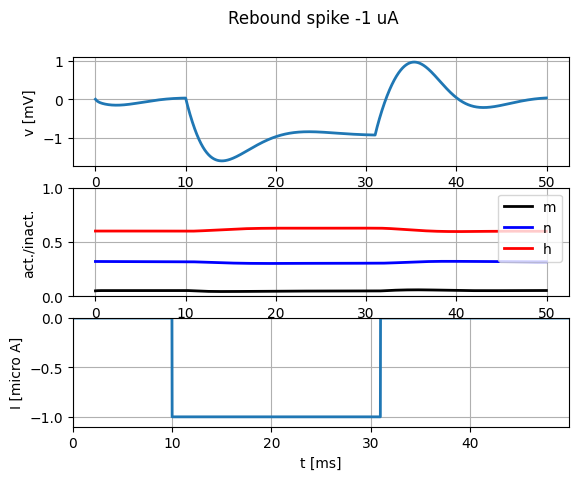

In [6]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

I_rebound = -1

current = input_factory.get_step_current(10, 30, b2.ms, I_rebound *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 50 * b2.ms)
HH.plot_data(state_monitor, title="Rebound spike -1 uA")

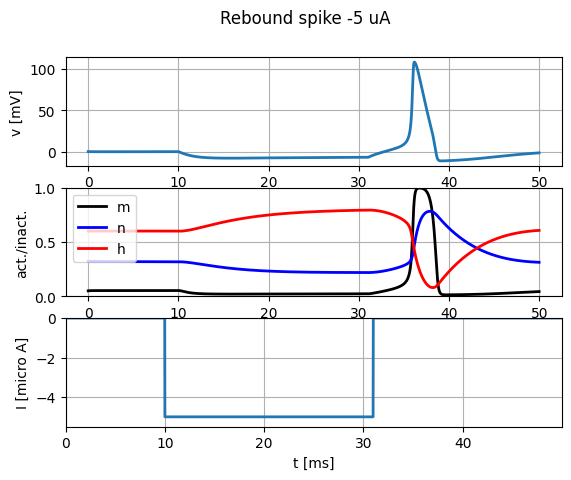

In [7]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

I_rebound = -5

current = input_factory.get_step_current(10, 30, b2.ms, I_rebound *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 50 * b2.ms)
HH.plot_data(state_monitor, title="Rebound spike -5 uA")

*What is happening here? To which gating variable do you attribute this rebound spike?*

Upon hyperpolarization h increases, leaving more sodium channels available to activate after hyperpolarization. m however decreases, leaving more closed sodium channels. It is important to remember that both "gates" have to be open for sodium to be able to flow out of the cell, i.e. h and m should be relatively high. When h is high, sodium channels are NOT inactivated, meaning they are ready to open when m allows it:

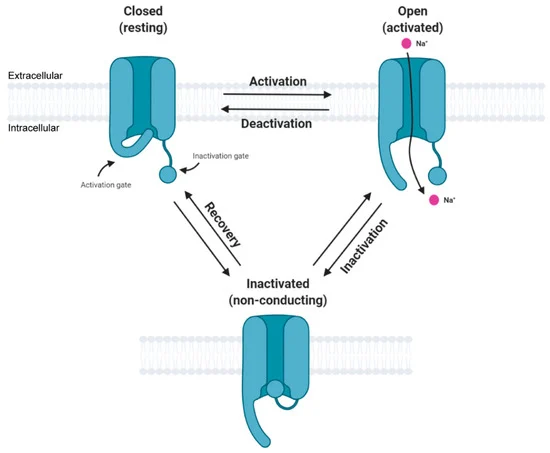

*Zybura, A., Hudmon, A., & Cummins, T. R. (2021). Distinctive Properties and Powerful Neuromodulation of Nav1.6 Sodium Channels Regulates Neuronal Excitability. Cells, 10(7), 1595. https://doi.org/10.3390/cells10071595*


The increase of h makes the neuron more excitable when hyperpolarization ends. So, as we see, after the hyperpolarizing current stops, a larger influx of Na+ triggers a rebound spike. 



***5.4. Exercise: Brian implementation of a HH neuron***

*In the source code of your function, change the density of sodium channels. Increase it by a factor of 1.4. Stimulate this modified neuron with a step current.*

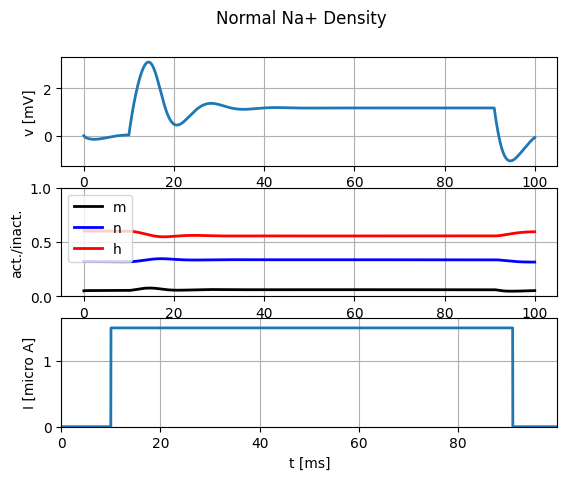

In [17]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

def HH_Sim_Emma(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 120 * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

I_stim = 1.5

current = input_factory.get_step_current(10, 90, b2.ms, I_stim *b2.uA)
state_monitor = HH_Sim_Emma(current, 100 * b2.ms)
HH.plot_data(state_monitor, title="Normal Na+ Density")


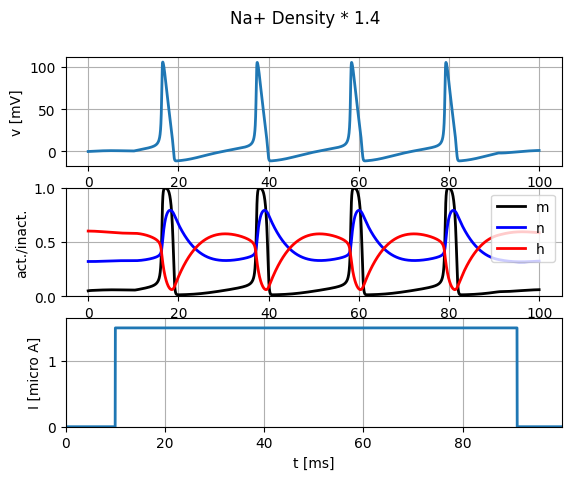

In [20]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

def HH_Sim_Emma(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 168 * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

I_stim = 1.5

current = input_factory.get_step_current(10, 90, b2.ms, I_stim *b2.uA)
state_monitor = HH_Sim_Emma(current, 100 * b2.ms)
HH.plot_data(state_monitor, title="Na+ Density * 1.4")


*What is the minimal current leading to repetitive spiking?*



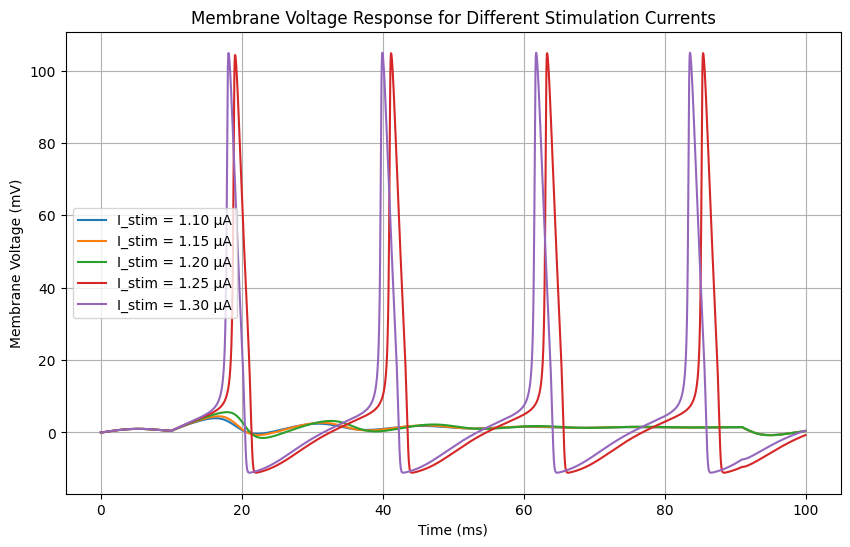

In [36]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

def HH_Sim_Emma(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 168 * b2.msiemens
    C = 1 * b2.ufarad

# forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

#I_stim_values = [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
I_stim_values = [1.1, 1.15, 1.2, 1.25, 1.3]
simulation_time = 100 * b2.ms


plt.figure(figsize=(10, 6))

for I_stim in I_stim_values:
    current = input_factory.get_step_current(10, 90, b2.ms, I_stim * b2.uA)
    state_monitor = HH_Sim_Emma(current, simulation_time)

    voltage_trace = state_monitor.vm[0] / b2.mV
    time_axis = state_monitor.t / b2.ms

    plt.plot(time_axis, voltage_trace, label=f"I_stim = {I_stim:.2f} µA")


plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")
plt.title("Membrane Voltage Response for Different Stimulation Currents: high Na+ density")
plt.legend()
plt.grid()
plt.show()



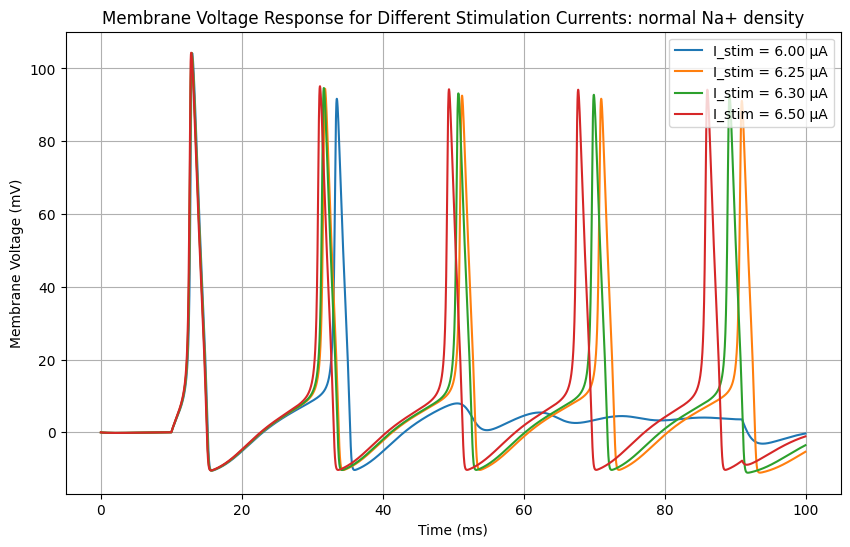

In [50]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

def HH_Sim_Emma(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 120 * b2.msiemens
    C = 1 * b2.ufarad

# forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

I_stim_values = [6, 6.25, 6.3, 6.5]	
#I_stim_values = [1.1, 1.15, 1.2, 1.25, 1.3]
simulation_time = 100 * b2.ms


plt.figure(figsize=(10, 6))

for I_stim in I_stim_values:
    current = input_factory.get_step_current(10, 90, b2.ms, I_stim * b2.uA)
    state_monitor = HH_Sim_Emma(current, simulation_time)

    voltage_trace = state_monitor.vm[0] / b2.mV
    time_axis = state_monitor.t / b2.ms

    plt.plot(time_axis, voltage_trace, label=f"I_stim = {I_stim:.2f} µA")


plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")
plt.title("Membrane Voltage Response for Different Stimulation Currents: normal Na+ density")
plt.legend()
plt.grid()
plt.show()


The minimum input current for spiking seems to be around 1.24 uA when the concentration of Na channels in the membrane is increased by a factor of 1.4. 
For normal sodium conductance, this number lies higher at around 6.25 uA. This makes sense, as a higher concentration of sodium channels allows for more sodium to enter the neuron which causes it to reach its action potential threshold with a smaller current. 


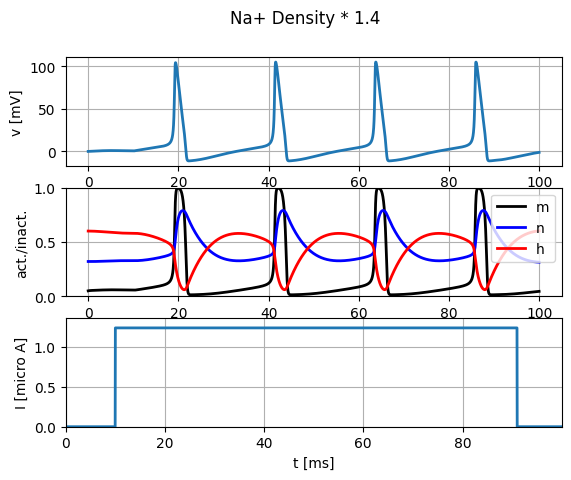

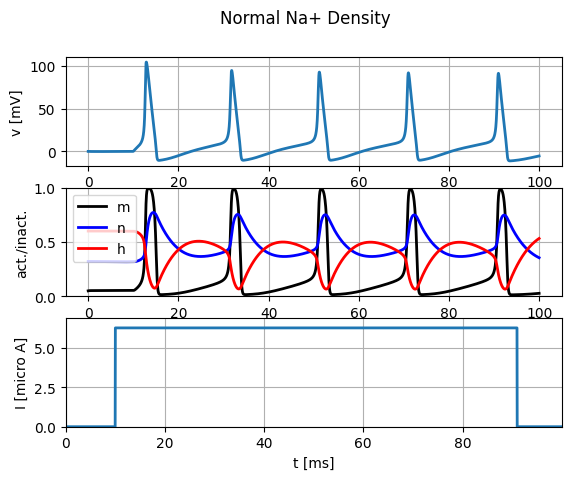

In [53]:
''' %matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

def HH_Sim_Emma(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 168 * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

I_stim = 1.24

current = input_factory.get_step_current(10, 90, b2.ms, I_stim *b2.uA)
state_monitor = HH_Sim_Emma(current, 100 * b2.ms)
HH.plot_data(state_monitor, title="Na+ Density * 1.4")

%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

def HH_Sim_Emma(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 120 * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

I_stim = 6.25

current = input_factory.get_step_current(10, 90, b2.ms, I_stim *b2.uA)
state_monitor = HH_Sim_Emma(current, 100 * b2.ms)
HH.plot_data(state_monitor, title="Normal Na+ Density")



*Run a simulation with no input current to determine the resting potential of the neuron. Link your observation to the Goldman–Hodgkin–Katz voltage equation.*

WARNING    c:\Users\emmac\anaconda3\envs\bmnn\Lib\site-packages\neurodynex3\hodgkin_huxley\HH.py:61: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.axis((
 [py.warnings]


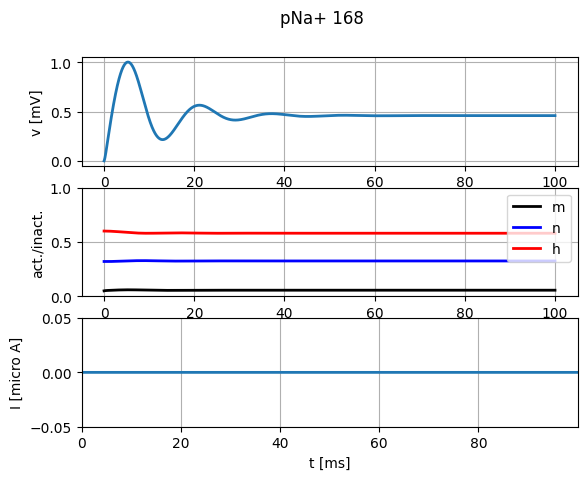

In [54]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

def HH_Sim_Emma(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 168 * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

I_stim = 0

current = input_factory.get_step_current(10, 90, b2.ms, I_stim *b2.uA)
state_monitor = HH_Sim_Emma(current, 100 * b2.ms)
HH.plot_data(state_monitor, title="pNa+ 168")


The normal resting potential of a neuron lies around -65 mV. The value of urest
is determined by the dynamic equilibrium between the ion flow through the channels (permeability of the membrane) and active ion transport (efficiency of the ion pump in maintaining the concentration difference). By increasing the Na+ conductance, i.e. the amount of sodium pumps, the balance of electrical charges across the neuron's membrane is altered. Moreover, this increased sodium conductance causes the neuron to depolarize, as more Na+ ions enter the cell (*https://www-sciencedirect-com.tudelft.idm.oclc.org/topics/neuroscience/membrane-conductance#:~:text=When%20a%20particular%20conductance%20is,while%20potassium%20conductances%20hyperpolarize%20it.*). 

To illustrate with the HGK equation: 

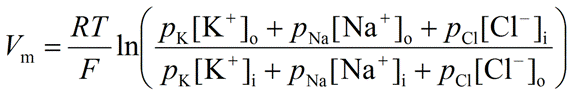

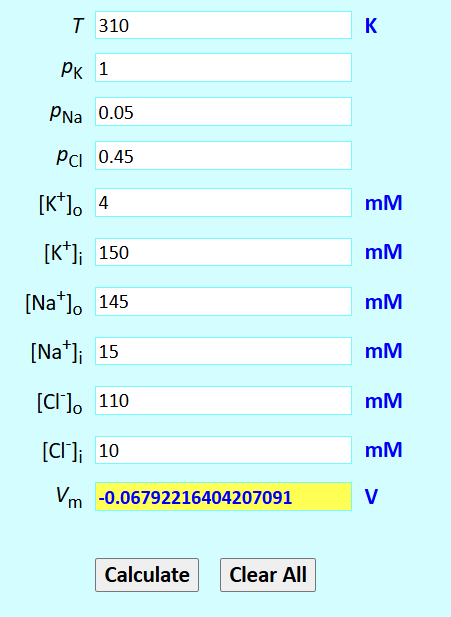

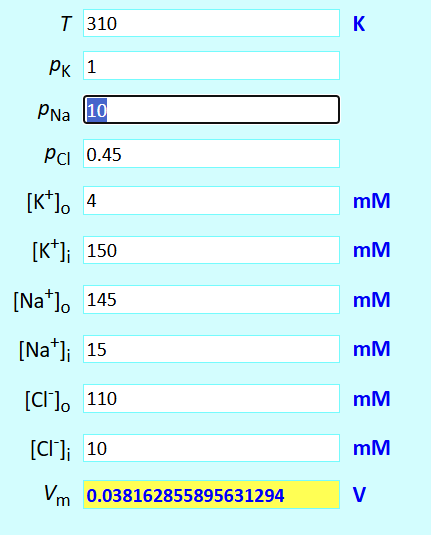

*If you increase the sodium conductance further, you can observe repetitive firing even in the absence of input, why?*

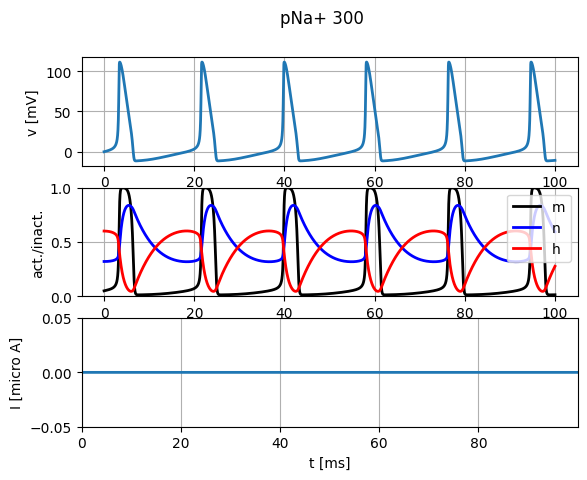

In [56]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

def HH_Sim_Emma(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 300 * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

I_stim = 0

current = input_factory.get_step_current(10, 90, b2.ms, I_stim *b2.uA)
state_monitor = HH_Sim_Emma(current, 100 * b2.ms)
HH.plot_data(state_monitor, title="pNa+ 300")


A larger sodium conductance increases neuronal excitability (*Arakaki, X., Foster, H., Su, L., Do, H., Wain, A. J., Fonteh, A. N., Zhou, F., & Harrington, M. G. (2011). Extracellular sodium modulates the excitability of cultured hippocampal pyramidal cells. Brain Research, 1401, 85-94. https://doi.org/10.1016/j.brainres.2011.05.037*). As the Na+ conductance increases and the neuron depolarizes and gets closer to the potential threshold, even small fluctuations in the membrane potential can lead to repetitive firing. In normal neurons, sodium and potassium conductances maintain a stable resting potential. However, due to the high density of sodium channels, the slow potassium channels do not get the chance de repolarize the neuron properly. 